NON-LINEAR / POLYNOMIAL REGRESSION

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [41]:
# load dataset
path = "../dataset/hour.csv"
df = pd.read_csv(path)

print("Dataset shape:", df.shape)

Dataset shape: (17379, 17)


In [42]:
# polynomial feature
df['temp2'] = df['temp'] ** 2

In [43]:
# feature and target
X_poly = df[['temp', 'temp2']]
y = df['cnt']

In [44]:
# split data
X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.3, random_state=30
)

In [45]:
poly_model = LinearRegression(copy_X=False)
poly_model.fit(X_train, y_train)

print("Intercept:", poly_model.intercept_)
print("Coefficients:")
for name, coef in zip(X_poly.columns, poly_model.coef_):
    print(name, ":", round(coef, 3))

Intercept: 14.573341388045293
Coefficients:
temp : 315.716
temp2 : 64.404


In [46]:
# predictions
y_pred_poly = poly_model.predict(X_test)

In [47]:
# evaluation
r2_poly = r2_score(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)

print("\nPolynomial Regression")
print("R2 Score:", round(r2_poly,4))
print("MSE:", round(mse_poly,2))


Polynomial Regression
R2 Score: 0.1651
MSE: 27287.25


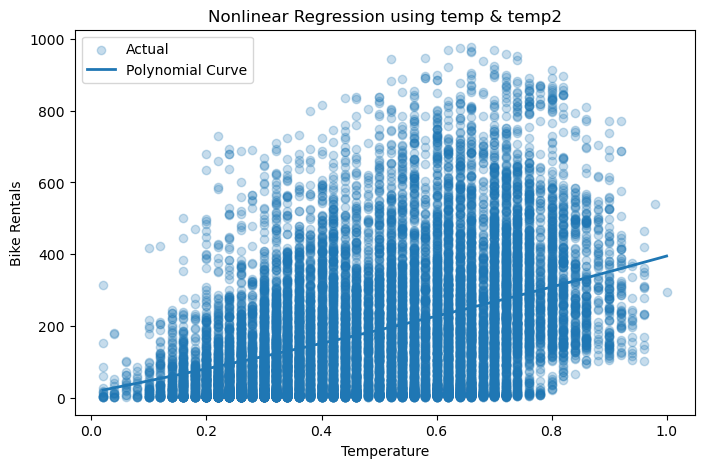

In [48]:
# regression curve
temp_range = np.linspace(df['temp'].min(), df['temp'].max(), 200)

temp2_range = temp_range ** 2

X_curve = pd.DataFrame({
    'temp': temp_range,
    'temp2': temp2_range
})

curve_pred = poly_model.predict(X_curve)

plt.figure(figsize=(8,5))
plt.scatter(df['temp'], y, alpha=0.25, label="Actual")
plt.plot(temp_range, curve_pred,
         linewidth=2, label="Polynomial Curve")

plt.xlabel("Temperature")
plt.ylabel("Bike Rentals")
plt.title("Nonlinear Regression using temp & temp2")
plt.legend()
plt.show()


In [49]:
# Comparison with Multiple Linear Regression

X_multi = df[['temp', 'atemp', 'hum', 'windspeed']]
y_multi = df['cnt']

Xm_train, Xm_test, ym_train, ym_test = train_test_split(
    X_multi, y_multi, test_size=0.3, random_state=30)

multi_model = LinearRegression()
multi_model.fit(Xm_train, ym_train)

y_pred_multi = multi_model.predict(Xm_test)

r2_multi = r2_score(ym_test, y_pred_multi)
mse_multi = mean_squared_error(ym_test, y_pred_multi)

print("\nMultiple Linear Regression")
print("R2 Score:", round(r2_multi,4))
print("MSE:", round(mse_multi,2))


Multiple Linear Regression
R2 Score: 0.2466
MSE: 24623.17
